# Analyse touch charts and vision charts

In [2]:
import numpy as np
import os
import object_reconstruction.data.touch_charts as touch_charts
import object_reconstruction.data.obj_pointcloud as obj_pointcloud
from object_reconstruction.utils import mesh_utils
import plotly.graph_objects as go
import trimesh
import meshplot as mp
import matplotlib.pyplot as plt


pybullet build time: Aug 27 2022 18:18:13


## Touch charts (extracted)

Check the `touch_charts.npy` file. This file contains a dictionary that I created to initialise the training set. The creation of this file is in `data_making\extract_touch_charts.py`.

Important: number of faces per mesh is not constant. 

In [3]:
touch_charts_dict = np.load(os.path.join(os.path.dirname(touch_charts.__file__), '3398', 'touch_charts_gt.npy'), allow_pickle=True).item()
print(touch_charts_dict.keys())

dict_keys(['verts', 'faces', 'tactile_imgs', 'pointclouds', 'rot_M_wrld', 'pos_wrld', 'pos_wrk', 'initial_pos'])


(10, 2000, 3)


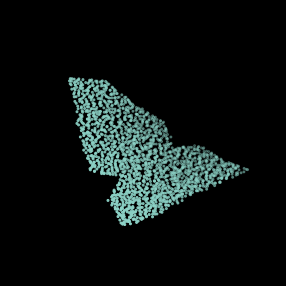

In [4]:
print(touch_charts_dict['pointclouds'].shape)
pointclouds = touch_charts_dict['pointclouds'][0]

# Attaching 3D axis to the figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
# Create plots
x = np.array([point + np.random.uniform(0, 0.001, size=1) for point in pointclouds[:, 0]]).ravel()
y = np.array([point + np.random.uniform(0, 0.00, size=1) for point in pointclouds[:, 1]]).ravel()
z = np.array([point + np.random.uniform(0, 0.00, size=1) for point in pointclouds[:, 2]]).ravel()
index = np.random.choice(np.arange(0, len(x), 1, dtype=int), size = 1000)
new_x = np.delete(x, index)
new_y = np.delete(y, index)
new_z = np.delete(z, index)
scatters = ax.scatter(x, y, z, s=4)
plt.axis('off')
plt.grid(visible=None)
plt.show()


In [ ]:
verts_example = touch_charts_dict['verts'][0].reshape(25, 3)

# Attaching 3D axis to the figure
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")
# Create plots
x = verts_example[:, 0]
y = verts_example[:, 1]
z = verts_example[:, 2]
scatters = ax.scatter(x, y, z, s=50, c='blue')
plt.axis('off')
plt.grid(visible=None)
plt.show()


Let's see now if we can always use the same schema for the faces. This means we predict 25 vertices, but always use the same faces. Faces are extracted from `active_reconstruction\data\touch_charts\touch_charts.obj`. Let's plot a few meshes and see if they make any sense:

In [ ]:
touch_charts_path = os.path.join(os.path.dirname(touch_charts.__file__), 'touch_chart.obj')
initial_verts, initial_faces = mesh_utils.load_mesh_touch(touch_charts_path)

touch_charts_dict_path = os.path.join(os.path.dirname(touch_charts.__file__), '102408', 'touch_charts_gt.npy')
touch_charts_dict = np.load(touch_charts_dict_path, allow_pickle=True).item()

verts = np.reshape(touch_charts_dict['verts'][0], (25, 3))
# scene = trimesh.scene.Scene(geometry=trimesh.Trimesh(verts, initial_faces))
# scene.show()

mp.subplot(verts, initial_faces.cpu().numpy().astype(np.int32), c=verts[:, 1], s=[2, 2, 0])

## Vision charts (obj)

In [ ]:
vision_charts_location = os.path.join(os.path.dirname(touch_charts.__file__), 'vision_charts.obj')

initial_verts, initial_faces = mesh_utils.load_mesh_touch(vision_charts_location)
print(f'The shape of initial_verts is: {initial_verts.shape}')
print(f'The shape of initial_faces is: {initial_faces.shape}')

x = initial_verts[:, 0]
y = initial_verts[:, 1]
z = initial_verts[:, 2]
# 3D plot (Plotly), except the points ([0, 0, 0])
fig = go.Figure(
    [go.Scatter3d(x=x, y=y,z=z, mode='markers',
        marker=dict(
            size=1
            )
    )]
)
fig.show()

In [ ]:
scene = trimesh.scene.Scene(geometry=trimesh.Trimesh(initial_verts, initial_faces))
scene.show()



### Random obj

In [ ]:
obj_location = os.path.join(os.path.dirname(touch_charts.__file__), '..', 'objects/627.obj')
initial_verts, initial_faces = mesh_utils.load_mesh_touch(obj_location)
scene = trimesh.scene.Scene(geometry=trimesh.Trimesh(initial_verts, initial_faces))
scene.show(viewer='gl')


# Analyse Touch Vision charts
In `extract_deformation.py`, I extract a dictionary containing information to train deformation. Here's what the dictionary contains:

In [5]:
idx_obj = '3398'
vision_touch_dict = np.load(os.path.join(os.path.dirname(touch_charts.__file__), idx_obj, 'touch_vision.npy'), allow_pickle=True).item()
print(vision_touch_dict.keys(), '\n')

print('Verts: it contains vertices of the initial sphere + touch charts. Some touch charts are empty (assigned value 0), others are not. The number of empty touch charts per instance is random. Mask contains information about this.')
print(f"The shape is: {vision_touch_dict['verts'].shape}")
print(f"Example of verts: {vision_touch_dict['verts'][0]}")

print('Faces: it contains faces of the initial sphere + touch charts.')
print(f"The shape is: {vision_touch_dict['faces'].shape}")
print(f"Example of faces: {vision_touch_dict['faces'][0]}")

print('Mask: it contains information about verts. Mask stores different values for vertices coming from an initial chart, a touch chart or an empty chart. 0: empty, 1: touch_chart, 2: initial')
print(f"The shape is: {vision_touch_dict['faces'].shape}")
print(f"Example of faces: {vision_touch_dict['faces'][0]}")


dict_keys(['verts', 'faces', 'mask']) 

Verts: it contains vertices of the initial sphere + touch charts. Some touch charts are empty (assigned value 0), others are not. The number of empty touch charts per instance is random. Mask contains information about this.
The shape is: (100, 1949, 3)
Example of verts: [[-0.159516  0.056806  0.198467]
 [-0.139094  0.07148   0.204226]
 [-0.157799  0.072021  0.192447]
 ...
 [ 0.        0.        0.      ]
 [ 0.        0.        0.      ]
 [ 0.        0.        0.      ]]
Faces: it contains faces of the initial sphere + touch charts.
The shape is: (100, 2464, 3)
Example of faces: [[   0    1    2]
 [   3    4    5]
 [   6    1    3]
 ...
 [1944 1929 1943]
 [1925 1929 1944]
 [1926 1925 1946]]
Mask: it contains information about verts. Mask stores different values for vertices coming from an initial chart, a touch chart or an empty chart. 0: empty, 1: touch_chart, 2: initial
The shape is: (100, 2464, 3)
Example of faces: [[   0    1    2]
 [   3    

### Plot vision chart verts for one object

In [11]:
# idx_obj = '102408'
# vision_touch_dict = np.load(os.path.join(os.path.dirname(touch_charts.__file__), idx_obj, 'touch_vision.npy'), allow_pickle=True).item()
# for idx, vision_chart in enumerate(vision_touch_dict['verts']):
#     if idx > 5:
#         break

#     # Verts sphere
#     x_sphere = vision_chart[:1824, 0]/2
#     y_sphere = vision_chart[:1824, 1]/2
#     z_sphere = vision_chart[:1824, 2]/2

#     # Verts touch
#     x_touch = vision_chart[1824:, 0]
#     y_touch = vision_chart[1824:, 1]
#     z_touch = vision_chart[1824:, 2]

#     # Verts gt point cloud
#     pointcloud_gt_path = os.path.join(os.path.dirname(obj_pointcloud.__file__), '102408', 'obj_pointcloud.npy')
#     pointcloud_gt = np.load(pointcloud_gt_path, allow_pickle=True)
#     x_gt = pointcloud_gt[:, 0]
#     y_gt = pointcloud_gt[:, 1]
#     z_gt = pointcloud_gt[:, 2]

#     # Full pointcloud touch charts (wrld)
#     touch_charts_gt_path = os.path.join(os.path.dirname(touch_charts.__file__), '102408', 'touch_charts_gt.npy')
#     touch_charts_gt = np.load(touch_charts_gt_path, allow_pickle=True).item()
#     full_pointcloud_wrk = touch_charts_gt['pointclouds']
#     pos_wrld = touch_charts_gt['pos_wrld']
#     rot_M_wrld = touch_charts_gt['rot_M_wrld']    
#     initial_pos = touch_charts_gt['initial_pos'] 
#     full_pointcloud_wrld = mesh_utils.translate_rotate_mesh(pos_wrld, rot_M_wrld, full_pointcloud_wrk, initial_pos)    
#     full_pointcloud_wrld = full_pointcloud_wrld.reshape(
#         full_pointcloud_wrld.shape[0] * full_pointcloud_wrld.shape[1], -1)
#     random_indexes = np.random.randint(low=0, high=full_pointcloud_wrld.shape[0], size=5000) # to donwscale the pointcloud density
#     x_full_pointcloud_wrld = full_pointcloud_wrld[random_indexes, 0]
#     y_full_pointcloud_wrld = full_pointcloud_wrld[random_indexes, 1]
#     z_full_pointcloud_wrld = full_pointcloud_wrld[random_indexes, 2]

#     # Verts touch chart rotated
#     verts_wrk = 
idx_obj = '3398'
vision_touch_dict = np.load(os.path.join(os.path.dirname(touch_charts.__file__), idx_obj, 'touch_vision.npy'), allow_pickle=True).item()
for idx, vision_chart in enumerate(vision_touch_dict['verts']):
    if idx > 5:
        break

    # Verts sphere
    x_sphere = vision_chart[:1824, 0]/2
    y_sphere = vision_chart[:1824, 1]/2
    z_sphere = vision_chart[:1824, 2]/2

    # Verts touch
    x_touch = vision_chart[1824:, 0]
    y_touch = vision_chart[1824:, 1]
    z_touch = vision_chart[1824:, 2]

    # Verts gt point cloud
    pointcloud_gt_path = os.path.join(os.path.dirname(obj_pointcloud.__file__), idx_obj, 'obj_pointcloud.npy')
    pointcloud_gt = np.load(pointcloud_gt_path, allow_pickle=True)
    x_gt = pointcloud_gt[:, 0]
    y_gt = pointcloud_gt[:, 1]
    z_gt = pointcloud_gt[:, 2]

    # Full pointcloud touch charts (wrld)
    touch_charts_gt_path = os.path.join(os.path.dirname(touch_charts.__file__), idx_obj, 'touch_charts_gt.npy')
    touch_charts_gt = np.load(touch_charts_gt_path, allow_pickle=True).item()
    full_pointcloud_wrk = touch_charts_gt['pointclouds']
    pos_wrld = touch_charts_gt['pos_wrld']
    rot_M_wrld = touch_charts_gt['rot_M_wrld']    
    initial_pos = touch_charts_gt['initial_pos']
    full_pointcloud_wrld = mesh_utils.translate_rotate_mesh(pos_wrld, rot_M_wrld, full_pointcloud_wrk, initial_pos)    
    full_pointcloud_wrld = full_pointcloud_wrld.reshape(
        full_pointcloud_wrld.shape[0] * full_pointcloud_wrld.shape[1], -1)
    random_indexes = np.random.randint(low=0, high=full_pointcloud_wrld.shape[0], size=5000) # to donwscale the pointcloud density
    x_full_pointcloud_wrld = full_pointcloud_wrld[random_indexes, 0]
    y_full_pointcloud_wrld = full_pointcloud_wrld[random_indexes, 1]
    z_full_pointcloud_wrld = full_pointcloud_wrld[random_indexes, 2]

    # Verts touch chart rotated
    verts_wrk = touch_charts_gt['verts'].reshape(-1, 25, 3) # from (m, 75) to (m, 25, 3)
    verts_wrld = mesh_utils.translate_rotate_mesh(pos_wrld, rot_M_wrld, verts_wrk, initial_pos)
    verts_wrld = verts_wrld.reshape(verts_wrld.shape[0] * verts_wrld.shape[1], 3)
    x_verts_wrld = verts_wrld[:,0]
    y_verts_wrld = verts_wrld[:,1]
    z_verts_wrld = verts_wrld[:,2]    
    fig = go.Figure(
        [   #go.Scatter3d(x=x_sphere, y=y_sphere,z=z_sphere, mode='markers',marker=dict(size=1)),
            go.Scatter3d(x=x_touch, y=y_touch,z=z_touch, mode='markers',marker=dict(size=3, color='red')),
            go.Scatter3d(x=x_gt, y=y_gt,z=z_gt, mode='markers',marker=dict(size=1, color='orange')),
            go.Scatter3d(x=x_full_pointcloud_wrld, y=y_full_pointcloud_wrld,z=z_full_pointcloud_wrld, 
            mode='markers',marker=dict(size=1, color='blue')),
            go.Scatter3d(x=x_verts_wrld, y=y_verts_wrld,z=z_verts_wrld, 
            mode='markers',marker=dict(size=2, color='green')),

        ]
    )
    fig.show()
        